In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import matplotlib.pyplot as plt
from IPython.display import HTML,display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
c:\Users\taniy\anaconda3\envs\test\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df_main = pd.read_csv('df_for_eda.csv')


#### 1. PRE-COVID (2015-2019)

In [3]:
#For dates less than 2020-01-01, we add into data frame
df = df_main.copy()
df = df[df['Date'] <= ('2020-01-01')] 
df['Industrial_Pollution'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df['Automobile_Pollution'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3','Benzene','Toluene','Xylene'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16248 entries, 3 to 24849
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  16248 non-null  object 
 1   Date                  16248 non-null  object 
 2   AQI                   16248 non-null  int64  
 3   AQI_Bucket            16248 non-null  object 
 4   Industrial_Pollution  16248 non-null  float64
 5   Automobile_Pollution  16248 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 888.6+ KB


##### 1. Automobile

In [4]:
df['Automobile_Pollution'].iplot(title="Automobile Pollution in India (Pre-Covid)", xTitle='City', yTitle='Automobile Pollution', linecolor='black', theme='pearl', colors=['purple'])

This graph depicts the relationship between automobile pollution levels and different cities in India during the pre-COVID period from 2015 to 2019. We notice that for the city around the 10000th row (Delhi) has the highest median Automobile pollution content. This can be seen in the plot below.

In [5]:
df_automobile = df.groupby('City')['Automobile_Pollution'].median().sort_values(ascending=False).head(10)
plot = df_automobile.iplot(kind='bar', xTitle='City', yTitle='Automobile Pollution', title='Top 10 Cities with highest Automobile Pollution (Pre-Covid)', color='lightblue')
plot


Among all the cities, Delhi experienced the highest levels of automobile pollution before the COVID era, with Patna and Gurugram following closely behind.

In [6]:
df_automobile = df.groupby('City')['Automobile_Pollution'].mean().sort_values(ascending=True).head(20)
plot = df_automobile.iplot(kind='bar', xTitle='City', yTitle='Automobile Pollution', title='Top 10 Cities with least Automobile Pollution (Pre-Covid)', color='lightblue')
plot

Shillong possesses the lowest automobile pollution content among all cities.

##### 2. Industrial

In [7]:
#Plot graph for industrial pollution
df['Industrial_Pollution'].iplot(title="Industrial Pollution in India (Pre-Covid)", xTitle='City', yTitle='Industrial Pollution', linecolor='black', theme='pearl', colors=['red'])

This graph depicts the connection between industrial pollution levels across different cities in India during the pre-COVID period from 2015 to 2019.The city present between the 0th to 1000th row (Ahmedabad) appears to have the highest median industrial pollution content. This can also be seen in the plot below. 

In [8]:
#Max cities with industrial pollution

df_industrial = df.groupby('City')['Industrial_Pollution'].median().sort_values(ascending=False).head(10)
plot = df_industrial.iplot(kind='bar', xTitle='City', yTitle='Industrial Pollution', title='Top 10 Cities with Industrial Pollution (Pre-Covid)', color='red')
plot


In the top 10 cities, Ahmedabad registered the highest industrial pollution levels prior to
the COVID era, with Delhi and Bhopal closely trailing behind

In [9]:
#Min cities with industrial pollution

df_industrial = df.groupby('City')['Industrial_Pollution'].mean().sort_values(ascending=True).head(10)
plot = df_industrial.iplot(kind='bar', xTitle='City', yTitle='Industrial Pollution', title='Top 10 Cities with least Industrial Pollution', color='red')
plot

In the list of the top 10 cities with the least industrial pollution before the COVID era,
Ernakulam, Kochi, and Aizawl have secured the top positions.


### 2. DURING COVID (2020)


In [10]:
df = df_main.copy()
df = df[df['Date'] > ('2020-01-01')] 
df['Industrial_Pollution'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df['Automobile_Pollution'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 24848
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  8602 non-null   object 
 1   Date                  8602 non-null   object 
 2   AQI                   8602 non-null   int64  
 3   AQI_Bucket            8602 non-null   object 
 4   Industrial_Pollution  8602 non-null   float64
 5   Automobile_Pollution  8602 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 470.4+ KB


##### 1. Automobile

In [11]:
df['Automobile_Pollution'].iplot(title="Automobile Pollution in India", xTitle='City', yTitle='Automobile Pollution', linecolor='black', theme='pearl', colors=['purple'])

The graph illustrates the distribution of automobile pollution across Indian cities after the
onset of COVID-19 in 2020. Here again, the median value for Delhi appears to be the highest.

In [12]:
df_automobile = df.groupby('City')['Automobile_Pollution'].median().sort_values(ascending=False).head(10)
plot = df_automobile.iplot(kind='bar', xTitle='City', yTitle='Automobile Pollution', title='Top 10 Cities with highest Automobile Pollution', color='lightblue')
plot

Even after a slight improvement in the Air Quality Index (AQI), Delhi, Patna, and Gurugram continue to hold the leading positions for automobile pollution post-COVID.

In [13]:
df_automobile = df.groupby('City')['Automobile_Pollution'].mean().sort_values(ascending=True).head(10)
plot = df_automobile.iplot(kind='bar', xTitle='City', yTitle='Automobile Pollution', title='Top 10 Cities with least Automobile Pollution', color='lightblue')
plot

Ranking first among the ten cities with the least amount of vehicle pollution prior to the
start of COVID-19 are Shillong and Aizawl. Hyderabad has moved up to the tenth spot on
this list, taking Lucknow’s place.



##### 2. Industrial 

In [14]:
df['Industrial_Pollution'].iplot(title="Industrial Pollution in India", xTitle='City', yTitle='Industrial Pollution', linecolor='black', theme='pearl', colors=['red'])

The graph shows how industrial pollution was distributed among cities following the onset
of COVID-19 in 2020

In [15]:
#Max cities with industrial pollution

df_industrial = df.groupby('City')['Industrial_Pollution'].median().sort_values(ascending=False).head(10)
plot = df_industrial.iplot(kind='bar', xTitle='City', yTitle='Industrial Pollution', title='Top 10 Cities with Industrial Pollution', color='red')
plot



The order of the top ten cities with the highest levels of industrial pollution following the
COVID-19 pandemic is in line with the pre-pandemic ranking, with Ahmedabad, Delhi, and
Bhopal at the top of the list.


In [16]:
df_industrial = df.groupby('City')['Industrial_Pollution'].mean().sort_values(ascending=True).head(10)
plot = df_industrial.iplot(kind='bar', xTitle='City', yTitle='Industrial Pollution', title='Top 10 Cities with least Industrial Pollution', color='red')
plot

Ernakulam, Kochi, and Aizawl top the list of the top ten cities with the least amount of
industrial pollution following the COVID period. 

##### Overall Observations:



1. Highest Automobile Pollution Content:
    - Even though Delhi remains the leading city with the highest automobile pollutants, there is definitely a decrease in the amount by 4%.
    - Patna and Gurugram's pollutant content did not reduce
    - Talcher reduced had the highest amount of decrease by 19% post covid
    - Jaipur, Ahmedabad, Kochi decreased by 2% post covid
    - Kolkata's pollutant content reduced by 14%
2. Highest Industrial Pollution Content:
    - Ahmedabad remained the highest during both periods
    - Patna decreased its pollutant content by near 10%
    - There was negligible decrease in case of Jaipur and the rest of the cities.
3. Lowest Automobile Pollution Content:
    - Although Shillong continued to be the city with the least pollutant content, there was still a decrease of nearly 15%.
    - Aizawl's pollutant content reduced by 8%
    - Thiruvananthapuram's pollutant content remained the same.
4. Lowest Industrial Pollution Content:
    - There was not much change in the pollutant content
    
Although there was quite a significant change with respect to automobile pollutant content, we do not see the same in case of industrial. This could be because of the overall decrease in vehicular traffic during covid, whereas the industries did continue to run even during covid to some extent.
The cities with lower automobile and industrial pollution content didn't see much change. 
One probable reason for the lack of change with respect to industrial pollution content is that there was no major industrial plant present in these locations.



#### 3. CORRELATION

In [17]:
cor = df_main.corr()
cor.style.background_gradient(cmap = "PuRd")


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.591513,0.457582,0.363315,0.382105,0.200744,0.091609,0.144264,0.177452,0.024454,0.134611,0.225446,0.659040
PM10,0.591513,1.000000,0.415739,0.257125,0.385965,0.119100,-0.099580,0.104185,0.168601,0.002381,0.088539,0.231860,0.372963
NO,0.457582,0.415739,1.000000,0.472267,0.783350,0.162250,0.218146,0.179779,0.018261,0.045461,0.150170,0.086446,0.452622
NO2,0.363315,0.257125,0.472267,1.000000,0.626590,0.119909,0.371783,0.402353,0.287242,0.045740,0.308256,0.148104,0.534174
NOx,0.382105,0.385965,0.783350,0.626590,1.000000,0.137860,0.251119,0.209450,0.105787,0.063298,0.204588,0.078452,0.449556
NH3,0.200744,0.119100,0.162250,0.119909,0.137860,1.000000,-0.109271,-0.118562,0.080918,0.001714,-0.019646,-0.152196,0.048527
CO,0.091609,-0.099580,0.218146,0.371783,0.251119,-0.109271,1.000000,0.482002,0.023826,0.053689,0.281412,0.142561,0.676924
SO2,0.144264,0.104185,0.179779,0.402353,0.209450,-0.118562,0.482002,1.000000,0.165669,0.035005,0.274929,0.177521,0.482601
O3,0.177452,0.168601,0.018261,0.287242,0.105787,0.080918,0.023826,0.165669,1.000000,0.020547,0.137498,0.061740,0.190770
Benzene,0.024454,0.002381,0.045461,0.045740,0.063298,0.001714,0.053689,0.035005,0.020547,1.000000,0.708183,0.063703,0.050137


- Factors with the highest correlation:
    - NOx and NO (0.783)
    - Toluene and Benzene (0.708)
- Factors with the least correlation:
    - NH3 and Xylene
    - NH3 and CO
    - NH3 and SO2

### 4. AQI ON INDIAN MAP

In [18]:
df1 = pd.read_csv('IND_cities_geo_data.csv')

In [19]:
df_new = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'city')

In [20]:
C1 = df_new['City'].unique()
C2 = df_new['city'].unique()

In [21]:
missing = []
for i in C1:
    if i not in C2:
        missing.append(i)

In [22]:
geo_data = df_new.groupby('City').agg(
#air_quality = pd.NamedAgg('AQI',pd.Series.mode),
aqi = pd.NamedAgg('AQI',np.mean),
lat = pd.NamedAgg('latitude',max),
lng = pd.NamedAgg('longitude',max)
).reset_index()

In [23]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


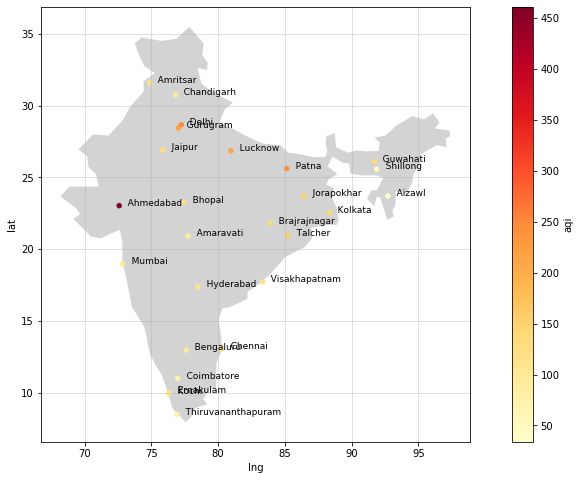

In [24]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)

for idx, row in geo_data.iterrows():
    ax.annotate(str('   '+row['City']), (row['lng'], row['lat']),size=9 )
ax.grid(b=True,alpha=0.5)
plt.show()

According to the image, Ahmedabad has the highest average Air Quality Index (AQI), whereas Aizawl has the lowest average AQI.
- The northern parts of India contain the cities with higher AQI relative to the southern parts of India
    - Highest AQI based on Region: 
        - West India: Ahmedabad
        - East India: Talcher
        - North India: Delhi and Patna
        - South India: Vishakhapatnam
    - Lowest AQI based on Region:
        - West India: Mumbai
        - East India: Aizawl
        - North India: Chandigarh
        - South India: Coimbatore

The same can be seen at the plot below


In [25]:
#Plot for average AQI values for each city

df = df_main.groupby(['City']).mean().sort_values(by='AQI',ascending=False).reset_index()
df['AQI'] = df['AQI'].round(2)
df = df.set_index('City')
df = df[['AQI']]
df.iplot(kind='bar',xTitle='City',yTitle='AQI',title='Mean AQI values for all cities',colors='blue')


### 5. PROPORTION OF POLLUTANTS

In [26]:
import plotly.express as px
df = df_main.copy()
df = df.drop(columns = ['Date', 'AQI_Bucket', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

We see a difference in data set sizes, with Delhi having the most values and Aizawl having the fewest. Furthermore, the data distribution suggests that PM10 contributes the most, whereas Xylene contributes the least.



### 6. HYPOTHESIS TESTING 
Checking for significance of Industrial and Autombile Pollutants in a City

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
def test_lin_reg(df, target_column='AQI', hypothesis_matrix='Xylene = 0'):
    df = df.drop(columns=['Date', 'AQI_Bucket', 'City'])
    X = df.drop(columns=[target_column])
    Y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    X_train_with_const = sm.add_constant(X_train)

    model_statsmodels = sm.OLS(y_train, X_train_with_const).fit()

    # Perform the Wald test if hypothesis_matrix is provided
    if hypothesis_matrix:
        # Perform the Wald test
        wald_test_result = model_statsmodels.wald_test(hypothesis_matrix, scalar=False)

        # Return the p-value for further evaluation
        return wald_test_result.pvalue

# Iterate through unique cities
unique_cities = df_main['City'].unique()
significance_data = []

for city_name in unique_cities:
    city_data = df_main[df_main['City'] == city_name].copy()  # Copy to avoid modifying the original DataFrame
    
    Indus_hyp = 'Benzene = Toluene = Xylene = O3 = SO2 = 0'
    Auto_hyp = 'PM2.5 = PM10 = NO = NO2 = NOx = NH3 = CO = 0'
    # Test significance for Industrial Pollution content
    p_value_indus = test_lin_reg(city_data, target_column='AQI', hypothesis_matrix=Indus_hyp)
    p_value_auto = test_lin_reg(city_data, target_column='AQI', hypothesis_matrix=Auto_hyp)
    # Determine significance based on p-value
    if p_value_indus  < 0.05:
        is_significant_indus = 'Yes'
    else:
        is_significant_indus = 'No'
    if p_value_auto  < 0.05:
        is_significant_auto = 'Yes'
    else:
        is_significant_auto = 'No'

    # Append data to the significance DataFrame
    significance_data.append({'City': city_name, 'Industrial Pollution Content': is_significant_indus, 'Automobile Pollution Content': is_significant_auto})
    #significance_data.append({'City': city_name,  'Automobile Pollution Content': is_significant_auto,  'Automobile Pollution p-value': p_value_auto})

# Create the significance DataFrame
significance_df = pd.DataFrame.from_dict(significance_data)

significance_df


c:\Users\taniy\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 7, but rank is 6

c:\Users\taniy\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4

c:\Users\taniy\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4

c:\Users\taniy\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2

c:\Users\taniy\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:1873: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3

c:\Users\t

,City,Industrial Pollution Content,Automobile Pollution Content
0,Ahmedabad,Yes,Yes
1,Aizawl,No,Yes
2,Amaravati,Yes,Yes
3,Amritsar,No,Yes
4,Bengaluru,Yes,Yes
5,Bhopal,No,Yes
6,Brajrajnagar,No,Yes
7,Chandigarh,Yes,Yes
8,Chennai,Yes,Yes
9,Coimbatore,Yes,Yes


- While industrial pollution content does not have much significance in some cities, we see that automovile pollution content is significant in all the 26 cities. This could be because the PM2.5 and PM10 values are present and are significant for all cities in order to calculate the final AQI value. 
- Another factor could be that not all cities have major industries that produce Xylene, Toluene, Benzene etc.